In [1]:
import os
import pandas as pd
import torch
from Data_loader import *
from WGAN_models import WGAN
from DCGAN_models import DCGAN
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from Dataset.CIFAR_dataloader import test_loader as cifar_test_loader
import torch
from torchmetrics.image.fid import FrechetInceptionDistance
from evaluate import *

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


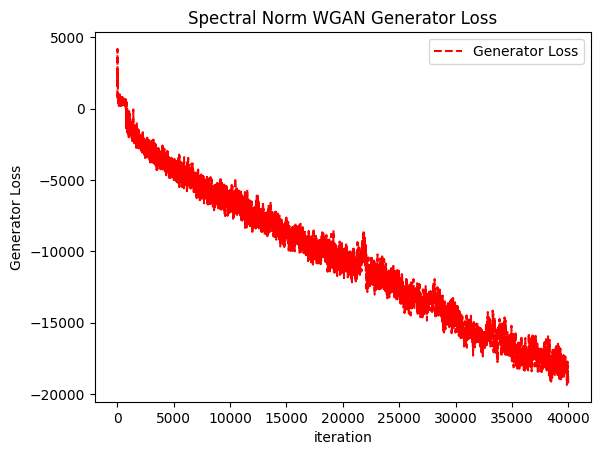

In [3]:
train_set = "CIFAR"
show_Generator_Losses(dcgan = False, gradient_penalty=False,
                               spectral_norm=True, train_set=train_set, iter=0)

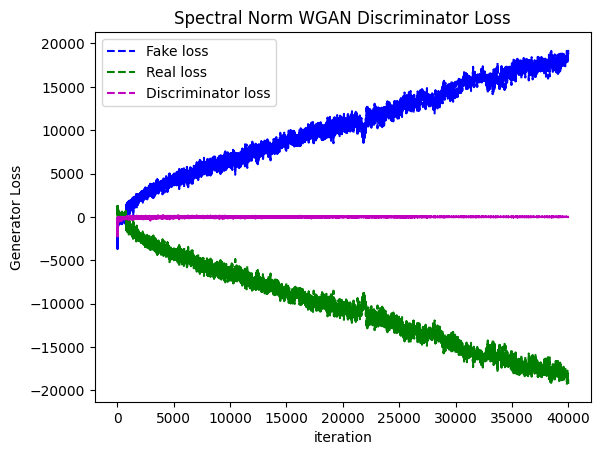

In [4]:
show_Discriminator_Losses(dcgan = False, gradient_penalty=False,
                               spectral_norm=True, train_set=train_set, iter=0)

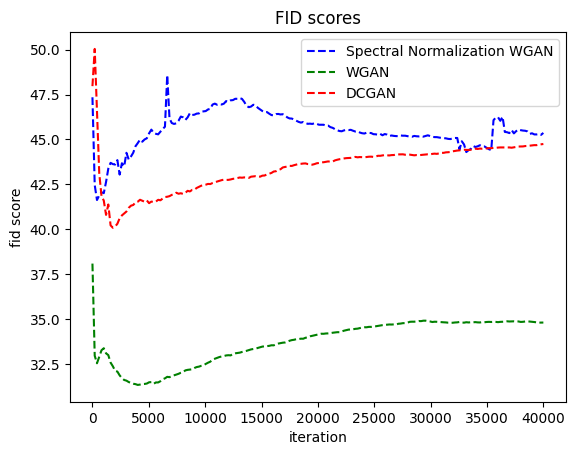

In [6]:
show_fid_score(train_set=train_set, iter=40000)

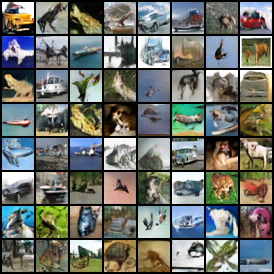

In [5]:
from IPython.display import Image
path = 'Results/WGAN_CIFAR/img_generatori_iter_40000.png'
Image(filename=path)

In [1]:
#for best model fid, discriminator and generator loss over time 
import matplotlib.pyplot as plt
import os
import numpy as np 
from scipy.stats import sem
import pandas as pd
import seaborn as sns
data = pd.read_csv("results_fid.csv")

C:\Users\karl\AppData\Local\Temp\ipykernel_23092\3150105830.py:13: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=data_final, x="variable", y="value", jitter=True,palette=color_palette)


Text(0, 0.5, 'fid')

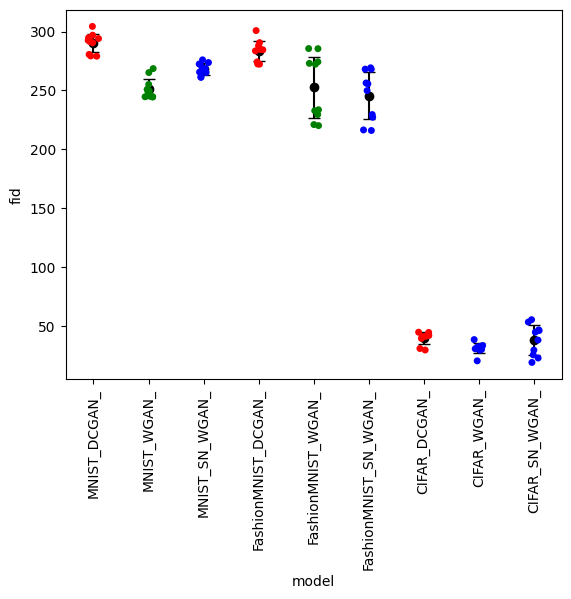

In [2]:
data_new = data[['MNIST_DCGAN_', 'MNIST_WGAN_', 'MNIST_SN_WGAN_','FashionMNIST_DCGAN_','FashionMNIST_WGAN_','FashionMNIST_SN_WGAN_', 'CIFAR_DCGAN_', 'CIFAR_WGAN_','CIFAR_SN_WGAN_' ]]
data_final = data_new.melt()
labels = list(data_new.columns.values)
vals = list(data_new.transpose().values.tolist())
mean_vals = [np.mean(x) for x in vals]
stddev = [np.std(data) for data in vals] 
colors = ['red','green','blue']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))
color_palette = {'MNIST_DCGAN_':'red','MNIST_WGAN_':'green','MNIST_SN_WGAN_':'blue', 
                'FashionMNIST_DCGAN_':'red','FashionMNIST_WGAN_':'green','FashionMNIST_SN_WGAN_':'blue','CIFAR_DCGAN_':'red', 'CIFAR_WGAN_':'blue','CIFAR_SN_WGAN_':'blue' }
plt.plot()
sns.stripplot(data=data_final, x="variable", y="value", jitter=True,palette=color_palette)
plt.errorbar(labels,mean_vals,yerr=stddev,fmt="o",color='black', capsize=4)
plt.xticks(rotation=90)
plt.xlabel('model')
plt.ylabel('fid')